КОД С ДОМАШНИМ ЗАДАНИЕМ! 

In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import classification_report

### Подготовка данных для использования
 - Получение Датасета
 - Получение Даталоадера
 - Просмотр данных

In [4]:
train_dataset = datasets.MNIST(
    root = './data',
    train = True,
    download = True,
    transform=ToTensor()
)
test_dataset = datasets.MNIST(
    root = './data',
    train = False,
    transform=ToTensor()
)

In [5]:
BATCH_SIZE = 64

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

In [ ]:
### Целевое значение
next(iter(train_dataloader))[1]

tensor([1, 3, 9, 4, 0, 9, 3, 3, 0, 8, 9, 8, 4, 6, 8, 7, 3, 1, 0, 7, 1, 6, 6, 0,
        4, 0, 9, 4, 7, 1, 9, 3, 1, 0, 2, 5, 0, 7, 9, 7, 8, 6, 4, 7, 7, 5, 5, 7,
        6, 4, 5, 9, 4, 1, 4, 6, 5, 5, 4, 7, 0, 6, 7, 9])

In [8]:
### Torch tensor
next(iter(train_dataloader))[0].shape

torch.Size([64, 1, 28, 28])

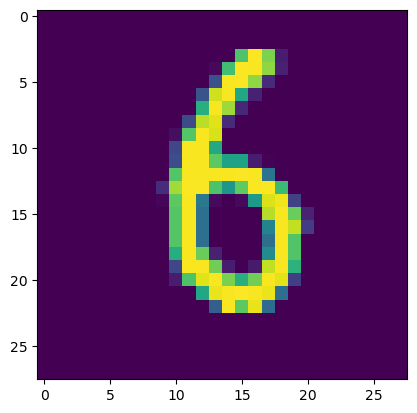

In [13]:
for_show = next(iter(train_dataloader))[0]
plt.imshow(for_show.numpy()[0][0])

### Построим нейронную сеть, чтобы для решения  МУЛЬТИКЛАССОВОЙ  задачи

In [26]:
#добавим еще линейный слоёк))
class IsTen(torch.nn.Module):
    def __init__(self, neurons):
        super().__init__()
        self.layer1 = torch.nn.Linear(neurons[0], neurons[1])
        self.layer2 = torch.nn.Linear(neurons[1], neurons[2])
        self.layer3 = torch.nn.Linear(neurons[2], neurons[3])
        self.layer4 = torch.nn.Linear(neurons[3], neurons[4])
        self.relu = torch.nn.ReLU()
        self.Softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = x.squeeze(1)
        x = x.flatten(1)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.Softmax(self.layer4(x))
        return x


In [27]:
model = IsTen([28*28, 256, 128, 64, 10])

### Функция, вычисляющая лосс

In [52]:
def loss_function(true, pred):
    loss = torch.nn.CrossEntropyLoss()#функуия потерь для мультиклассовой задачи
    return loss(pred, true)

### Оптимизатор

In [53]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 1e-3)

### Построим процесс обучения нейронной сети

In [54]:
NUM_EPOCHS = 100


In [55]:
train_loss = []
test_loss = []
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train(True)
    train_loss_epoch = 0
    test_loss_epoch = 0
    for X, y in train_dataloader:
        model.zero_grad()
        true = y
        predictions = model.forward(X)
        loss_value = loss_function(true, predictions)
        loss_value.backward()
        train_loss_epoch += loss_value.item()/len(train_dataloader)
        optimizer.step()
    train_loss.append(train_loss_epoch)
    model.train(False)
    for X, y in test_dataloader:
        true = y
        predictions = model.forward(X)
        loss_value = loss_function(true, predictions)
        test_loss_epoch += loss_value.item()/len(test_dataloader)
    test_loss.append(test_loss_epoch)


100%|██████████| 100/100 [16:31<00:00,  9.92s/it]


<Axes: >

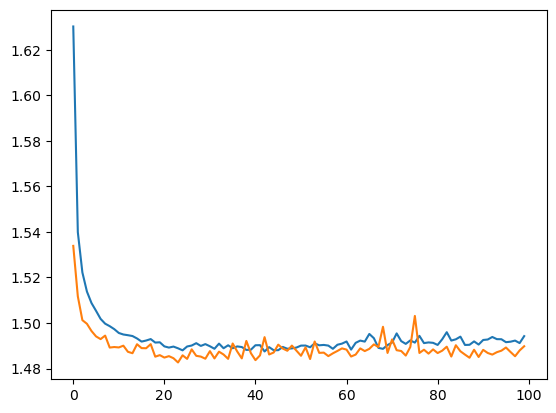

In [56]:
sns.lineplot(train_loss,label='Train Loss')
sns.lineplot(test_loss,label='Test Loss')

In [57]:
y_pred = []
y_true = []
for X, y in test_dataloader:
    predictions = model.forward(X)
    _, predicted = torch.max(predictions, 1)
    y_pred.extend(predicted.tolist())
    y_true.extend(y.tolist())

# Создание отчета классификации
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       979
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1027
           3       0.99      0.95      0.97      1009
           4       0.98      0.97      0.97       981
           5       0.97      0.97      0.97       892
           6       0.97      0.99      0.98       956
           7       0.99      0.97      0.98      1026
           8       0.91      0.99      0.95       972
           9       0.98      0.93      0.95      1007

    accuracy                           0.97      9984
   macro avg       0.97      0.97      0.97      9984
weighted avg       0.97      0.97      0.97      9984



чудесные результаты. И recall отличный и соответвенно f1 из-за этого очень хороший.

## добавим DROPOUT

In [58]:
class IsTenDROP(torch.nn.Module):
    def __init__(self, neurons):
        super().__init__()
        self.dropout = torch.nn.Dropout(0.3)
        self.layer1 = torch.nn.Linear(neurons[0], neurons[1])
        self.layer2 = torch.nn.Linear(neurons[1], neurons[2])
        self.layer3 = torch.nn.Linear(neurons[2], neurons[3])
        self.layer4 = torch.nn.Linear(neurons[3], neurons[4])
        self.relu = torch.nn.ReLU()
        self.Softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = x.squeeze(1)
        x = x.flatten(1)
        x = self.dropout(x)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.Softmax(self.layer4(x))
        return x

In [59]:
model = IsTenDROP([28*28, 256, 128, 64, 10])

учим

In [60]:
train_loss = []
test_loss = []
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train(True)
    train_loss_epoch = 0
    test_loss_epoch = 0
    for X, y in train_dataloader:
        model.zero_grad()
        true = y
        predictions = model.forward(X)
        loss_value = loss_function(true, predictions)
        loss_value.backward()
        train_loss_epoch += loss_value.item()/len(train_dataloader)
        optimizer.step()
    train_loss.append(train_loss_epoch)
    model.train(False)
    for X, y in test_dataloader:
        true = y
        predictions = model.forward(X)
        loss_value = loss_function(true, predictions)
        test_loss_epoch += loss_value.item()/len(test_dataloader)
    test_loss.append(test_loss_epoch)


100%|██████████| 100/100 [20:10<00:00, 12.10s/it]


смотрим изменения с Dropout

<Axes: >

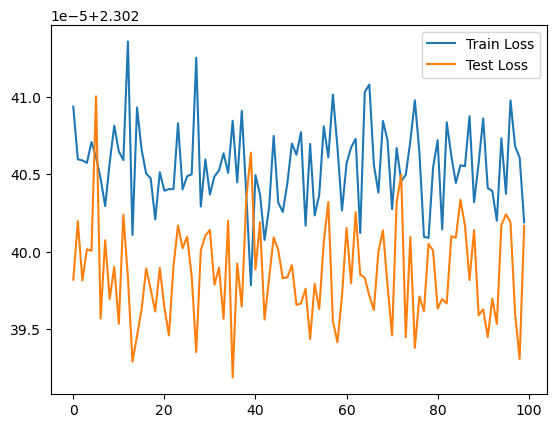

In [62]:
sns.lineplot(train_loss,label='Train Loss')
sns.lineplot(test_loss,label='Test Loss')

In [63]:
y_pred = []
y_true = []
for X, y in test_dataloader:
    predictions = model.forward(X)
    _, predicted = torch.max(predictions, 1)
    y_pred.extend(predicted.tolist())
    y_true.extend(y.tolist())

# Создание отчета классификации
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       976
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1029
           3       0.00      0.00      0.00      1009
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       891
           6       0.00      0.00      0.00       957
           7       0.00      0.00      0.00      1024
           8       0.00      0.00      0.00       972
           9       0.00      0.00      0.00      1009

    accuracy                           0.11      9984
   macro avg       0.01      0.10      0.02      9984
weighted avg       0.01      0.11      0.02      9984



c:\Users\sever\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sever\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sever\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## вывод

Проклятый дропаут поломал всю сеть к черту) поборолся с переобучением капитально и кардинально) Без дропаута сеть показывала отличные результаты - и переобучения не было. с дропаутом проще вслух говорить рандомные наименования цифр и чаще будешь попадать в правильный результа чем эта чудесная нейросеть)

Вообще дропаут помогал бороться с переобучением, но не в этот раз)

### Домашняя работа
Изменить нейронную сеть следующим образом:
 - Чтобы она решала задачу не бинарной классификации, а многоклассовой (Для этого нужно использовать другую лосс функцию и функцию активации на выходе)
 - Чтобы в ней было не 2 скрытых слоя, а три
 - Чтобы кол-во нейронов подставлялось через массив, поданный при инициализации класса модели
 - Чтобы происходил dropout (вероятность 0.3) до первого скрытого слоя. Показать, как это изменение повлияло на результат работы модели на тестовой выборке.
 - Посчитать метрики классификации через classification report (sklearn) для каждого класса